In [ ]:
!pip install imbalanced-learn==0.6.0

     ------------------------------------- 162.6/162.6 kB 2.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling
from imblearn import over_sampling
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle

In [ ]:
data = pd.read_excel('DS-pima-indians-diabetes.xlsx')

In [ ]:
data.shape

(768, 8)

In [ ]:
data.head()

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,"Class (1: positive for diabetes, 0: negative for diabetes)"
0,6.0,148.0,72.0,35.0,0.0,33.6,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,33.0,1


In [ ]:
data.columns

Index(['Number of times Pregnant', 'Plasma Concentration', 'Diastolic BP',
       'Triceps Skin fold thickness', 'insulin', 'BMI', 'Age',
       'Class (1: positive for diabetes, 0: negative for diabetes)'],
      dtype='object')

In [ ]:
data.columns = ['Number of times Pregnant', 'Plasma Concentration', 'Diastolic BP',
       'Triceps Skin fold thickness', 'insulin', 'BMI', 'Age',
       'Class']

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rahul\anaconda3\lib\si

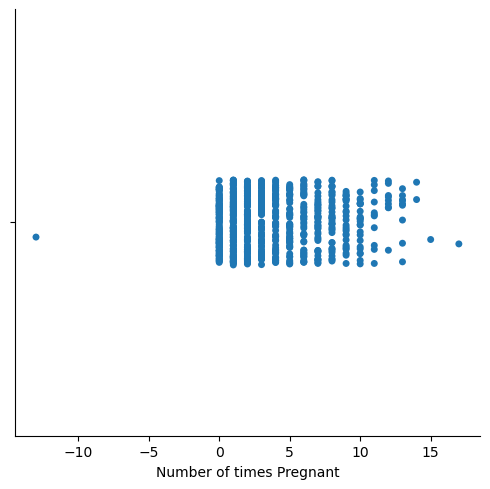

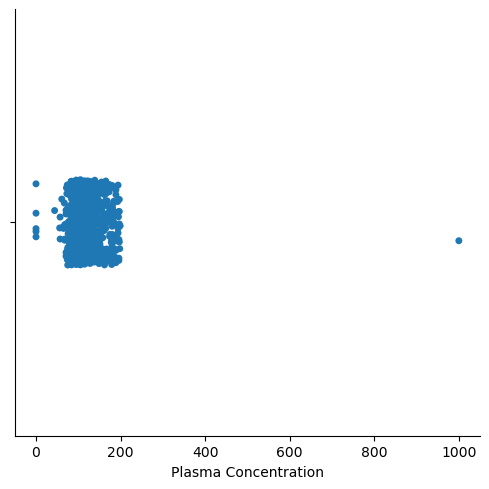

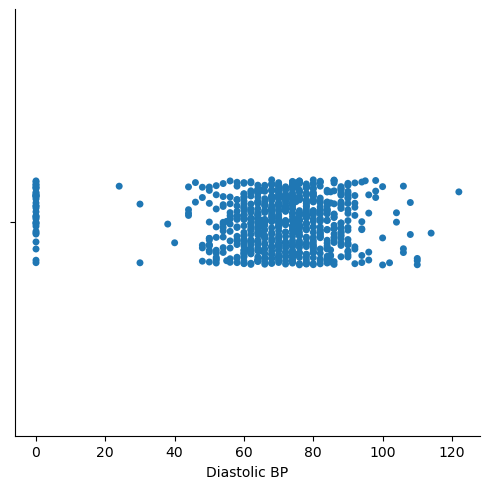

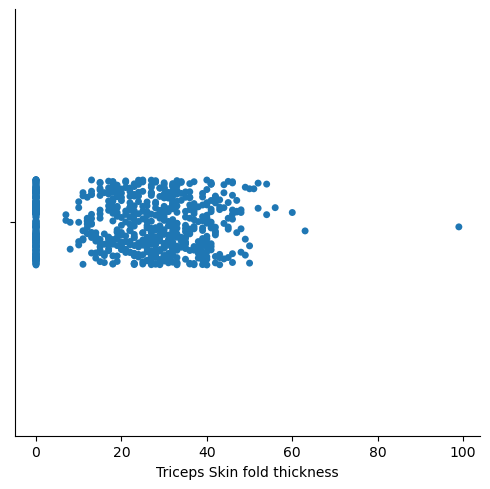

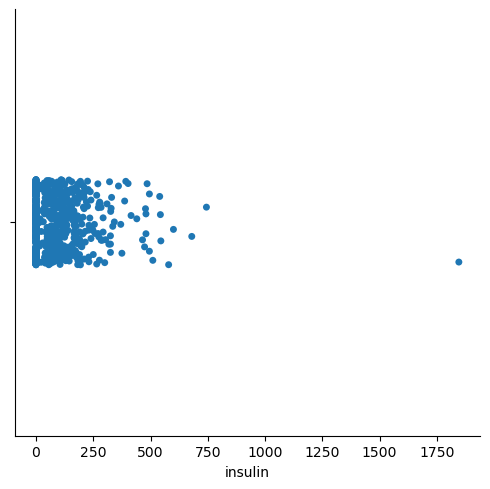

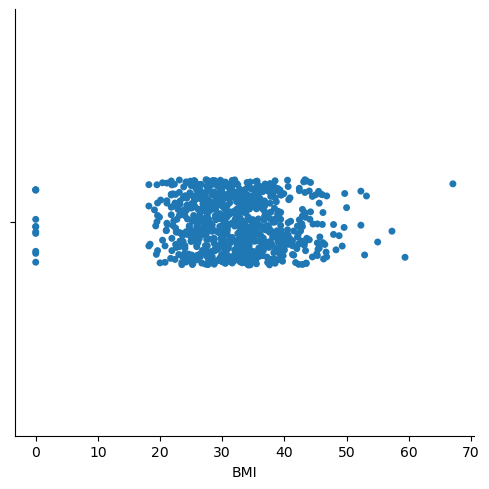

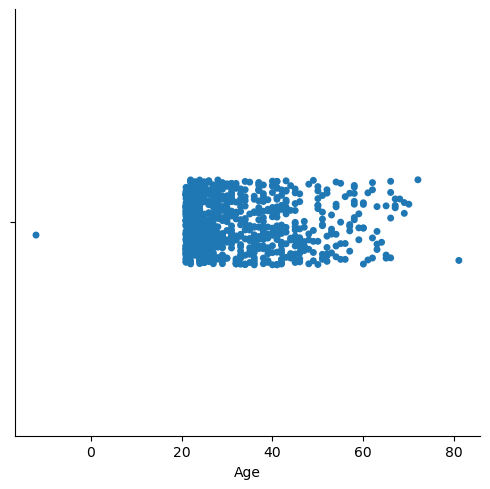

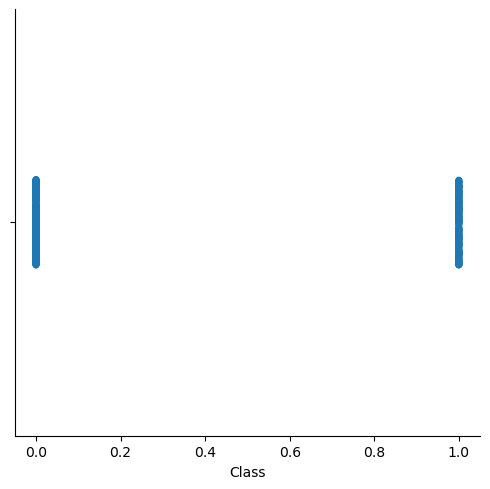

In [ ]:

for col in data.columns:
    sns.catplot(col, data = data)

In [ ]:
# as there are lots of values in Plasma Concentration	Diastolic BP	Triceps Skin fold thickness	insulin	BMI	Age as 0
# which is not correct i am replacing 0 with a null value and then treating all of them as null value

In [ ]:
c = ['Plasma Concentration','Diastolic BP','Triceps Skin fold thickness','insulin','BMI','Age']
for col in c:
    data[col] = np.where(data[col] == 0, np.NaN, data[col])

In [ ]:
data

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,50.0,1
1,1.0,85.0,66.0,29.0,NaN,26.6,31.0,0
2,8.0,183.0,64.0,NaN,NaN,23.3,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,33.0,1
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,63.0,0
764,2.0,122.0,70.0,27.0,NaN,36.8,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,30.0,0
766,1.0,126.0,60.0,NaN,NaN,30.1,47.0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number of times Pregnant     766 non-null    float64
 1   Plasma Concentration         762 non-null    float64
 2   Diastolic BP                 729 non-null    float64
 3   Triceps Skin fold thickness  540 non-null    float64
 4   insulin                      392 non-null    float64
 5   BMI                          754 non-null    float64
 6   Age                          766 non-null    float64
 7   Class                        768 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 48.1 KB


In [ ]:
data.isna().sum()

Number of times Pregnant         2
Plasma Concentration             6
Diastolic BP                    39
Triceps Skin fold thickness    228
insulin                        376
BMI                             14
Age                              2
Class                            0
dtype: int64

## working on null values

In [ ]:
data['Number of times Pregnant'].isna().sum()

2

In [ ]:
data[data['Number of times Pregnant'].isna()]

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,Class
118,NaN,97.0,60.0,23.0,NaN,28.2,22.0,0
218,NaN,85.0,74.0,22.0,NaN,29.0,32.0,1


In [ ]:
data['Number of times Pregnant'].mode()
data['Number of times Pregnant'].value_counts()

 1.0     135
 0.0     111
 2.0     103
 3.0      75
 4.0      67
 5.0      56
 6.0      50
 7.0      45
 8.0      38
 9.0      28
 10.0     24
 11.0     11
 13.0      9
 12.0      9
 14.0      2
 15.0      1
 17.0      1
-13.0      1
Name: Number of times Pregnant, dtype: int64

In [ ]:
pd.pivot_table(data[(data['Number of times Pregnant'] == 0) | (data['Number of times Pregnant'] == 1)], index = ['Number of times Pregnant', 'Class'], aggfunc= {'Class': 'count'})

Class
Number of times Pregnant Class       
0.0                      0         73
                         1         38
1.0                      0        106
                         1         29

In [ ]:
data['Number of times Pregnant'].fillna(0, inplace = True)

In [ ]:
data['Number of times Pregnant'].value_counts()

 1.0     135
 0.0     113
 2.0     103
 3.0      75
 4.0      67
 5.0      56
 6.0      50
 7.0      45
 8.0      38
 9.0      28
 10.0     24
 11.0     11
 13.0      9
 12.0      9
 14.0      2
 15.0      1
 17.0      1
-13.0      1
Name: Number of times Pregnant, dtype: int64

In [ ]:
data['Number of times Pregnant'] = np.where(data['Number of times Pregnant'] < 0, data['Number of times Pregnant']*(-1), data['Number of times Pregnant'])

In [ ]:
data['Number of times Pregnant'].value_counts()

1.0     135
0.0     113
2.0     103
3.0      75
4.0      67
5.0      56
6.0      50
7.0      45
8.0      38
9.0      28
10.0     24
11.0     11
13.0     10
12.0      9
14.0      2
15.0      1
17.0      1
Name: Number of times Pregnant, dtype: int64

####### a limit of about 40 pregnancies actually is probable, so i condier 17 as a correct number

In [ ]:
data.isna().sum()

Number of times Pregnant         0
Plasma Concentration             6
Diastolic BP                    39
Triceps Skin fold thickness    228
insulin                        376
BMI                             14
Age                              2
Class                            0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Plasma Concentration'>

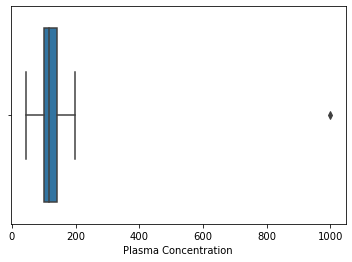

In [ ]:
sns.boxplot(data['Plasma Concentration'])

In [ ]:
data['Plasma Concentration'] = np.where(data['Plasma Concentration'] > 300, np.NaN, data['Plasma Concentration'])

In [ ]:
data[data['Plasma Concentration'].isna() == True]

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,Class
75,1.0,NaN,48.0,20.0,NaN,24.7,22.0,0
182,1.0,NaN,74.0,20.0,23.0,27.7,21.0,0
342,1.0,NaN,68.0,35.0,NaN,32.0,22.0,0
349,5.0,NaN,80.0,32.0,NaN,41.0,37.0,1
502,6.0,NaN,68.0,41.0,NaN,39.0,41.0,1
667,10.0,NaN,70.0,27.0,NaN,27.5,40.0,1
767,1.0,NaN,70.0,31.0,NaN,30.4,23.0,0


In [ ]:
data['Plasma Concentration'].mean()


121.73850197109067

In [ ]:
print(data[data['Class'] == 0]['Plasma Concentration'].mean())
print(data[data['Class'] == 1]['Plasma Concentration'].mean())


110.67943548387096
142.4377358490566


In [ ]:
data.loc[(data["Class"]==0) & (data['Plasma Concentration'].isnull()),'Plasma Concentration'] = data[data["Class"]==0]['Plasma Concentration'].mean()
data.loc[(data["Class"]==1) & (data['Plasma Concentration'].isnull()),'Plasma Concentration'] = data[data["Class"]==1]['Plasma Concentration'].mean()


In [ ]:
data[data['Class'] == 1]['Plasma Concentration'].isna().sum()

0

In [ ]:
data[data['Class'] == 0]['Plasma Concentration'].isna().sum()

0

In [ ]:
data.isna().sum()

Number of times Pregnant         0
Plasma Concentration             0
Diastolic BP                    39
Triceps Skin fold thickness    228
insulin                        376
BMI                             14
Age                              2
Class                            0
dtype: int64

In [ ]:
data[data['Diastolic BP'].isna()]

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,Class
7,10.0,115.0,NaN,NaN,NaN,35.3,29.0,0
15,7.0,100.0,NaN,NaN,NaN,30.0,32.0,1
25,10.0,125.0,NaN,26.0,115.0,31.1,41.0,1
49,7.0,105.0,NaN,NaN,NaN,NaN,24.0,0
60,2.0,84.0,NaN,NaN,NaN,NaN,21.0,0
78,0.0,131.0,NaN,NaN,NaN,43.2,26.0,1
81,2.0,74.0,NaN,NaN,NaN,NaN,22.0,0
83,0.0,101.0,NaN,28.0,NaN,24.6,22.0,0
172,2.0,87.0,NaN,23.0,NaN,28.9,25.0,0
193,11.0,135.0,NaN,NaN,NaN,52.3,40.0,1


In [ ]:
data['Diastolic BP'][data['Diastolic BP'] < 50].count()

16

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diastolic BP'>

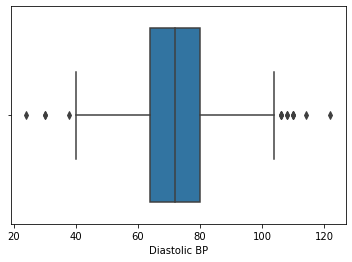

In [ ]:
sns.boxplot(data['Diastolic BP'])

In [ ]:
data['Diastolic BP'] = np.where(data['Diastolic BP'] < 40, np.NaN, data['Diastolic BP'])

In [ ]:
data['Diastolic BP'].isna().sum()

43

In [ ]:
data[data['Diastolic BP'].isna()].sort_values(by = 'Class')

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,Class
7,10.0,115.0,NaN,NaN,NaN,35.3,29.0,0
453,2.0,119.0,NaN,NaN,NaN,19.6,72.0,0
533,6.0,91.0,NaN,NaN,NaN,29.8,31.0,0
430,2.0,99.0,NaN,NaN,NaN,22.2,23.0,0
426,0.0,94.0,NaN,NaN,NaN,NaN,25.0,0
703,2.0,129.0,NaN,NaN,NaN,38.5,41.0,0
347,3.0,116.0,NaN,NaN,NaN,23.5,23.0,0
336,0.0,117.0,NaN,NaN,NaN,33.8,44.0,0
589,0.0,73.0,NaN,NaN,NaN,21.1,25.0,0
597,1.0,89.0,NaN,19.0,25.0,27.8,21.0,0


In [ ]:
data['Diastolic BP'].describe()

count    725.000000
mean      72.651034
std       12.035440
min       40.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: Diastolic BP, dtype: float64

In [ ]:
data.loc[(data["Class"]==0) & (data['Diastolic BP'].isna()),'Diastolic BP'] = data[data["Class"]==0]['Diastolic BP'].mean()
data.loc[(data["Class"]==1) & (data['Diastolic BP'].isna()),'Diastolic BP'] = data[data["Class"]==1]['Diastolic BP'].mean()

In [ ]:
data.isna().sum()

Number of times Pregnant         0
Plasma Concentration             0
Diastolic BP                     0
Triceps Skin fold thickness    228
insulin                        376
BMI                             14
Age                              2
Class                            0
dtype: int64

In [ ]:
data[['Triceps Skin fold thickness']].describe()

,Triceps Skin fold thickness
count,540.000000
mean,29.131481
std,10.474252
min,7.000000
25%,22.000000
50%,29.000000
75%,36.000000
max,99.000000


In [ ]:
data['Triceps Skin fold thickness'].value_counts().sort_values()

99.0     1
63.0     1
60.0     1
51.0     1
56.0     1
52.0     2
7.0      2
54.0     2
8.0      2
49.0     3
50.0     3
47.0     4
48.0     4
10.0     5
44.0     5
14.0     6
43.0     6
45.0     6
16.0     6
11.0     6
12.0     7
38.0     7
46.0     8
34.0     8
21.0    10
13.0    11
42.0    11
24.0    12
20.0    13
17.0    14
41.0    14
15.0    14
36.0    14
35.0    15
26.0    16
25.0    16
37.0    16
40.0    16
22.0    16
29.0    17
39.0    18
19.0    18
31.0    19
18.0    20
28.0    20
33.0    20
23.0    22
27.0    23
30.0    27
32.0    31
Name: Triceps Skin fold thickness, dtype: int64

In [ ]:
data['Triceps Skin fold thickness'][data['Triceps Skin fold thickness'] > 55].count()

4

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Triceps Skin fold thickness'>

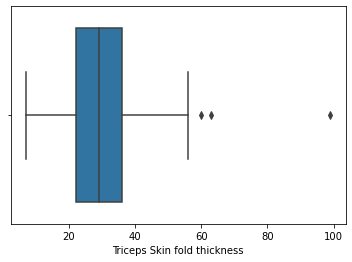

In [ ]:
sns.boxplot(data['Triceps Skin fold thickness'])

In [ ]:
data['Triceps Skin fold thickness'] = np.where(data['Triceps Skin fold thickness'] > 55, np.NaN, data['Triceps Skin fold thickness'])

In [ ]:
data['Triceps Skin fold thickness'][data['Triceps Skin fold thickness'] > 55].count()

0

In [ ]:
data['Triceps Skin fold thickness']

0      35.0
1      29.0
2       NaN
3      23.0
4      35.0
       ... 
763    48.0
764    27.0
765    23.0
766     NaN
767    31.0
Name: Triceps Skin fold thickness, Length: 768, dtype: float64

In [ ]:
data.loc[(data["Class"]==0) & (data['Triceps Skin fold thickness'].isna()),'Triceps Skin fold thickness'] = data[data["Class"]==0]['Triceps Skin fold thickness'].median()
data.loc[(data["Class"]==1) & (data['Triceps Skin fold thickness'].isna()),'Triceps Skin fold thickness'] = data[data["Class"]==1]['Triceps Skin fold thickness'].median()

In [ ]:
data.isna().sum()

Number of times Pregnant         0
Plasma Concentration             0
Diastolic BP                     0
Triceps Skin fold thickness      0
insulin                        376
BMI                             14
Age                              2
Class                            0
dtype: int64

In [ ]:
data[['insulin']].describe()

,insulin
count,392.000000
mean,157.956633
std,142.317414
min,14.000000
25%,76.000000
50%,125.000000
75%,190.000000
max,1846.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='insulin'>

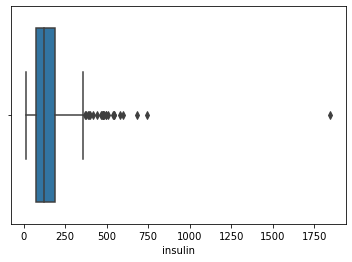

In [ ]:
sns.boxplot(data['insulin'])

In [ ]:
data['insulin'][data['insulin'] > 350].count()

25

In [ ]:
data['insulin'] = np.where(data['insulin'] > 350, np.NaN, data['insulin'])

In [ ]:
data.insulin.isna().sum()

401

In [ ]:
data.insulin.mean()

131.71389645776566

In [ ]:
data.insulin.median()

119.0

In [ ]:
data.loc[(data["Class"]==0) & (data['insulin'].isna()),'insulin'] = data[data["Class"]==0]['insulin'].median()
data.loc[(data["Class"]==1) & (data['insulin'].isna()),'insulin'] = data[data["Class"]==1]['insulin'].median()

In [ ]:
data.isna().sum()

Number of times Pregnant        0
Plasma Concentration            0
Diastolic BP                    0
Triceps Skin fold thickness     0
insulin                         0
BMI                            14
Age                             2
Class                           0
dtype: int64

In [ ]:
data.loc[(data["Class"]==0) & (data['BMI'].isna()),'BMI'] = data[data["Class"]==0]['BMI'].median()
data.loc[(data["Class"]==1) & (data['BMI'].isna()),'BMI'] = data[data["Class"]==1]['BMI'].median()

In [ ]:
data.BMI.describe()

count    768.000000
mean      32.442448
std        6.866066
min       18.200000
25%       27.600000
50%       32.050000
75%       36.525000
max       67.100000
Name: BMI, dtype: float64

In [ ]:
data.isna().sum()

Number of times Pregnant       0
Plasma Concentration           0
Diastolic BP                   0
Triceps Skin fold thickness    0
insulin                        0
BMI                            0
Age                            2
Class                          0
dtype: int64

In [ ]:
data.Age.describe()

count    766.000000
mean      33.197128
std       11.868189
min      -12.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [ ]:
data['Age'] = np.where(data['Age'] < 0, np.NaN, data['Age'])

In [ ]:
data.isna().sum()

Number of times Pregnant       0
Plasma Concentration           0
Diastolic BP                   0
Triceps Skin fold thickness    0
insulin                        0
BMI                            0
Age                            3
Class                          0
dtype: int64

In [ ]:
data.Age.mode()

0    22.0
dtype: float64

In [ ]:
data.Age.fillna(22,inplace = True)

In [ ]:
data.isna().sum()

Number of times Pregnant       0
Plasma Concentration           0
Diastolic BP                   0
Triceps Skin fold thickness    0
insulin                        0
BMI                            0
Age                            0
Class                          0
dtype: int64

In [ ]:
df = data

## Our final data is ready and exported into Excel

In [ ]:
df.to_excel('Final.xlsx', index=False)

In [ ]:
df

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,Class
0,6.0,148.000000,72.0,35.0,160.0,33.6,50.0,1
1,1.0,85.000000,66.0,29.0,97.5,26.6,31.0,0
2,8.0,183.000000,64.0,32.0,160.0,23.3,32.0,1
3,1.0,89.000000,66.0,23.0,94.0,28.1,21.0,0
4,0.0,137.000000,40.0,35.0,168.0,43.1,33.0,1
...,...,...,...,...,...,...,...,...
763,10.0,101.000000,76.0,48.0,180.0,32.9,63.0,0
764,2.0,122.000000,70.0,27.0,97.5,36.8,27.0,0
765,5.0,121.000000,72.0,23.0,112.0,26.2,30.0,0
766,1.0,126.000000,60.0,32.0,160.0,30.1,47.0,1


In [ ]:
df.Class.value_counts()

0    500
1    268
Name: Class, dtype: int64

<AxesSubplot:>

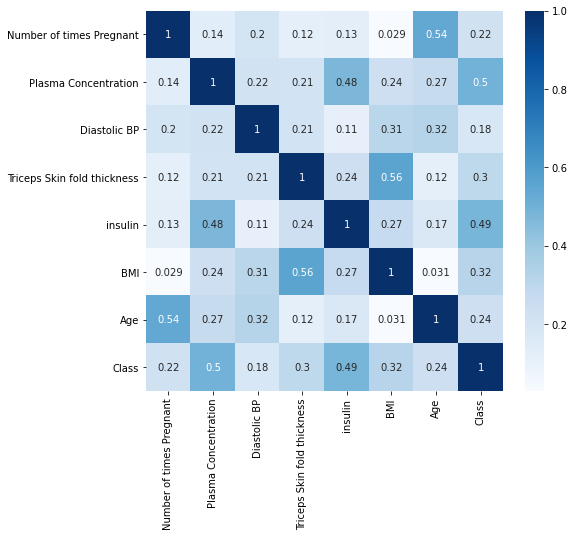

In [ ]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

##### 1. There is no relation between two features.

In [ ]:
df.columns

Index(['Number of times Pregnant', 'Plasma Concentration', 'Diastolic BP',
       'Triceps Skin fold thickness', 'insulin', 'BMI', 'Age', 'Class'],
      dtype='object')

In [ ]:
c = ['Number of times Pregnant', 'Plasma Concentration', 'Diastolic BP',
       'Triceps Skin fold thickness', 'insulin', 'BMI', 'Age']

In [ ]:
df.describe()

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.833333,121.761759,72.675534,28.869792,126.300781,32.442448,33.212240,0.348958
std,3.375011,30.453828,11.705320,8.294371,55.555903,6.866066,11.760673,0.476951
min,0.000000,44.000000,40.000000,7.000000,14.000000,18.200000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,25.000000,97.500000,27.600000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,97.500000,32.050000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,160.000000,36.525000,41.000000,1.000000
max,17.000000,199.000000,122.000000,54.000000,342.000000,67.100000,81.000000,1.000000


In [ ]:
df['Number of times Pregnant'].value_counts()

1.0     135
0.0     113
2.0     103
3.0      75
4.0      67
5.0      56
6.0      50
7.0      45
8.0      38
9.0      28
10.0     24
11.0     11
13.0     10
12.0      9
14.0      2
15.0      1
17.0      1
Name: Number of times Pregnant, dtype: int64

<BarContainer object of 17 artists>

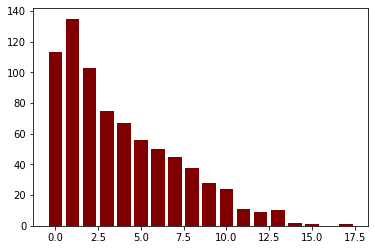

In [ ]:
plt.bar(pd.DataFrame(df['Number of times Pregnant'].value_counts()).index, df['Number of times Pregnant'].value_counts(), color ='maroon', width = 0.8)

##### 2. 50% of the women got pregnent 3 or less time and 25% of the women got pregnent over 6 times
##### 3. 34 women got pregnent over 10 times

(array([  4.,  19.,  87., 148., 164., 125.,  91.,  54.,  44.,  32.]),
 array([ 44. ,  59.5,  75. ,  90.5, 106. , 121.5, 137. , 152.5, 168. ,
        183.5, 199. ]),
 <BarContainer object of 10 artists>)

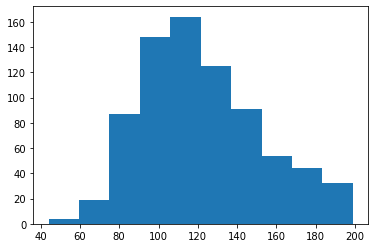

In [ ]:
plt.hist(df['Plasma Concentration'], range = (df['Plasma Concentration'].min(), df['Plasma Concentration'].max()), bins=10)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Plasma Concentration'>

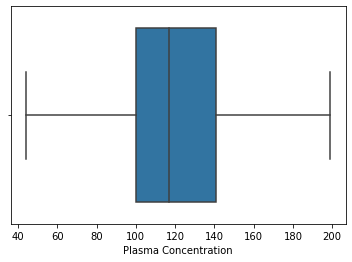

In [ ]:
sns.boxplot(df['Plasma Concentration'])

#### 4. 50% of the women has the plasma concentration between 100 and 141

<AxesSubplot:xlabel='Age', ylabel='Count'>

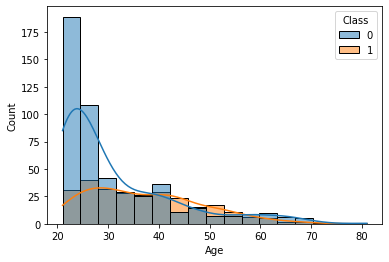

In [ ]:
sns.histplot(data=df, x="Age", color="red", label="Age", kde=True, hue = "Class")

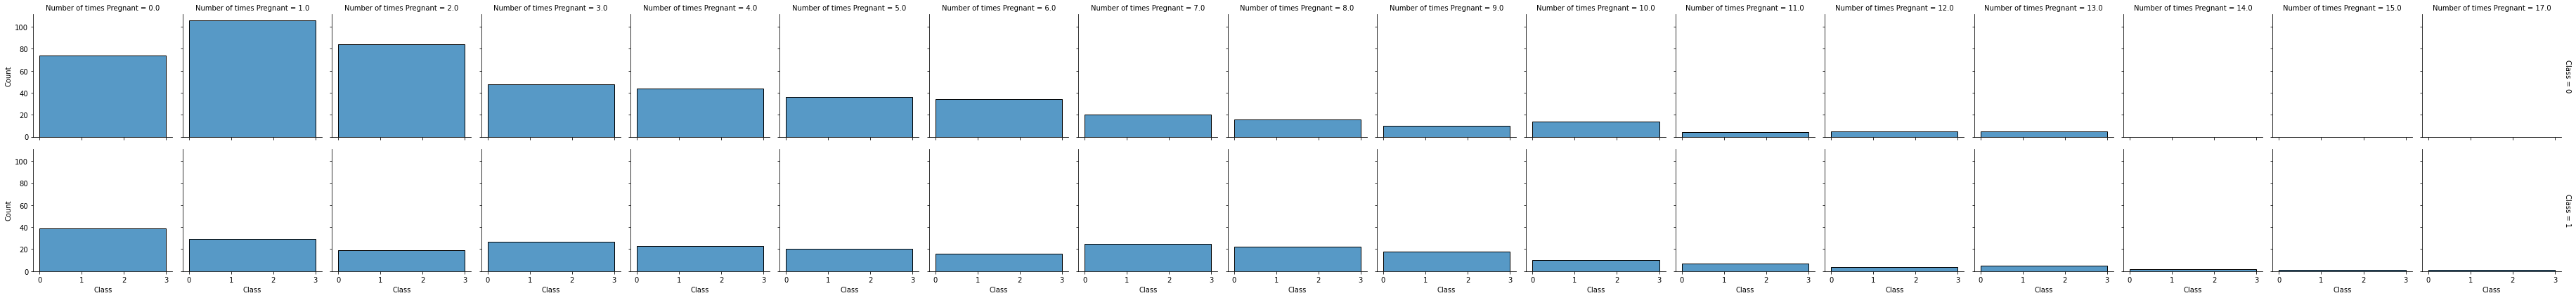

In [ ]:
sns.displot(df, x="Class", col="Number of times Pregnant", row="Class", binwidth=3, height=3, facet_kws=dict(margin_titles=True))

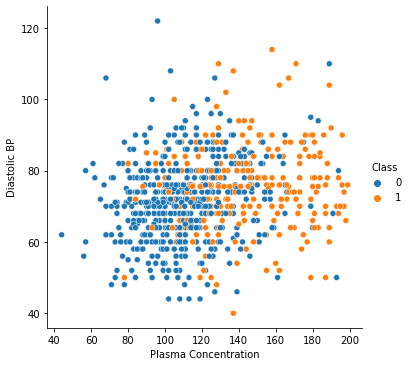

In [ ]:
sns.relplot(data=df,x="Plasma Concentration", y="Diastolic BP", hue = 'Class')

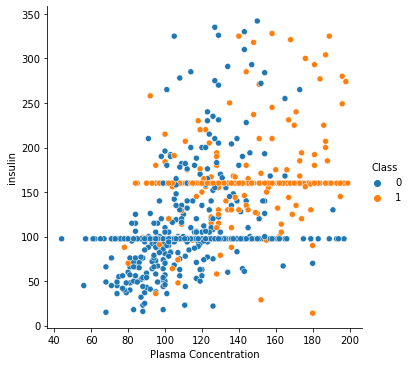

In [ ]:
sns.relplot(data=df,x="Plasma Concentration", y="insulin", hue = 'Class')

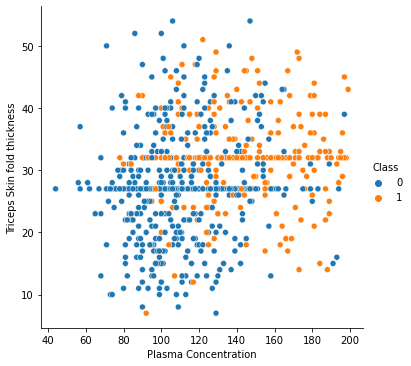

In [ ]:
sns.relplot(data=df,x="Plasma Concentration", y="Triceps Skin fold thickness", hue = 'Class')

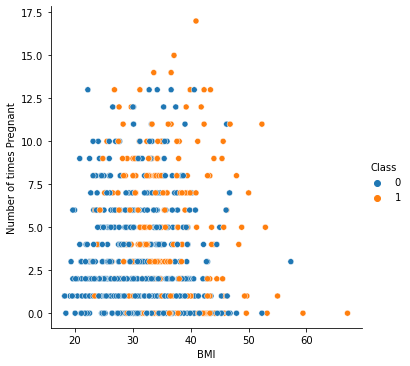

In [ ]:
sns.relplot(data=df,x="BMI", y="Number of times Pregnant", hue = 'Class')

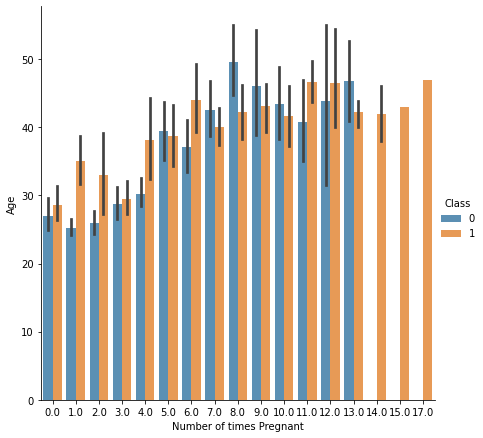

In [ ]:
#plt.figure(figsize=(40,20))
sns.catplot(data=df, kind="bar", x="Number of times Pregnant", y="Age", hue="Class", height= 6, alpha=.8)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1181: UserWarning: The following kwargs were not used by contour: 'kind', 'height'
  cset = contour_func(


<AxesSubplot:xlabel='Plasma Concentration', ylabel='Number of times Pregnant'>

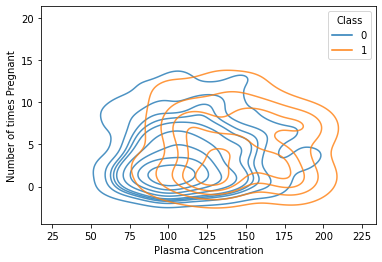

In [ ]:
sns.kdeplot(data=df, kind="bar", x="Plasma Concentration", y="Number of times Pregnant", hue="Class",  height= 6, alpha=.8)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1181: UserWarning: The following kwargs were not used by contour: 'kind', 'height'
  cset = contour_func(


<AxesSubplot:xlabel='Age', ylabel='Number of times Pregnant'>

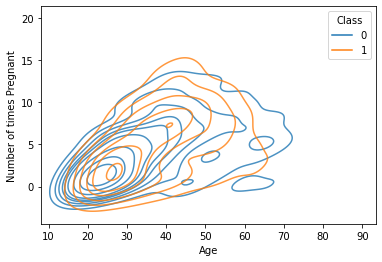

In [ ]:
sns.kdeplot(data=df, kind="bar", x="Age", y="Number of times Pregnant", hue="Class",  height= 6, alpha=.8)

In [ ]:
df.head()

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,Class
0,6.0,148.0,72.0,35.0,160.0,33.6,50.0,1
1,1.0,85.0,66.0,29.0,97.5,26.6,31.0,0
2,8.0,183.0,64.0,32.0,160.0,23.3,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,33.0,1


##### Now I want to correct this imbalanced data using SMOTE

In [ ]:
df.Class.value_counts()

0    500
1    268
Name: Class, dtype: int64

In [ ]:
smt = SMOTE()

In [ ]:
X = df.drop('Class', axis = 1)

In [ ]:
y = df.Class

In [ ]:
X_res, y_res = smt.fit_resample(X, y)

In [ ]:
X_res.shape, y_res.shape

((1000, 7), (1000,))

#### Splitting Test and Train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

## Different Model training

#### Logistic Regression

In [ ]:
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.820
Test set score: 0.790


#### KNN

In [ ]:
for n in range(10, 35):
    knn = KNeighborsClassifier(n_neighbors= n)
    knn.fit(X_train, y_train)
    knn.score(X_train, y_train)
    print('Number of Neighbour:', n)
    print("Training set score: {:.3f}".format(knn.score(X_train, y_train)))
    print("Test set score: {:.3f}".format(knn.score(X_test, y_test)))

Number of Neighbour: 10
Training set score: 0.899
Test set score: 0.840
Number of Neighbour: 11
Training set score: 0.892
Test set score: 0.855
Number of Neighbour: 12
Training set score: 0.886
Test set score: 0.850
Number of Neighbour: 13
Training set score: 0.889
Test set score: 0.855
Number of Neighbour: 14
Training set score: 0.886
Test set score: 0.850
Number of Neighbour: 15
Training set score: 0.885
Test set score: 0.855
Number of Neighbour: 16
Training set score: 0.887
Test set score: 0.855
Number of Neighbour: 17
Training set score: 0.886
Test set score: 0.860
Number of Neighbour: 18
Training set score: 0.882
Test set score: 0.855
Number of Neighbour: 19
Training set score: 0.884
Test set score: 0.860
Number of Neighbour: 20
Training set score: 0.885
Test set score: 0.860
Number of Neighbour: 21
Training set score: 0.885
Test set score: 0.845
Number of Neighbour: 22
Training set score: 0.886
Test set score: 0.835
Number of Neighbour: 23
Training set score: 0.886
Test set score

In [ ]:
# Number of Neighbour: 31
# Training set score: 0.867
# Test set score: 0.865

#### Decision Tree

In [ ]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.865


In [ ]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.892
Accuracy on test set: 0.825


In [ ]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.916
Accuracy on test set: 0.835


In [ ]:
tree.feature_importances_

array([0.01039893, 0.049677  , 0.        , 0.07642303, 0.78129988,
       0.02119919, 0.06100197])

#### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.885


In [ ]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.905
Accuracy on test set: 0.860


In [ ]:
rf2 = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=0)
rf2.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.905
Accuracy on test set: 0.860


In [ ]:
rf3 = RandomForestClassifier(max_depth=6, n_estimators=100, random_state=0)
rf3.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.905
Accuracy on test set: 0.860


In [ ]:
pickle.dump(rf3, open(r'C:\Users\dyadav\Videos\CBRE\Final_Model.pkl','wb'))